In [92]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from meteostat import Stations, Daily, Hourly
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [5]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "114186",
    'client_secret': '535f4e9fce8216e83d23ecf9644b9b3c00f05ba5',
    'refresh_token': '3f8ab023c1f397d9fa98ed15ca94977267deb54c',
    'grant_type': "refresh_token",
    'f': 'json'
}

# First API call to request access token
# Access tokens expire, so this saves you manual work of regenerating access tokens manually
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

# Make API request to retrieve the last 400 activities
header = {'Authorization': 'Bearer ' + access_token}
param1 = {'per_page': 200, 'page': 1}
param2 = {'per_page': 200, 'page': 2}
param3 = {'per_page': 200, 'page': 3}
my_dataset1 = requests.get(activites_url, headers=header, params=param1).json()
my_dataset2 = requests.get(activites_url, headers=header, params=param2).json()
my_dataset3 = requests.get(activites_url, headers=header, params=param3).json()

print(my_dataset1[0]["name"])
print(my_dataset1[0]["map"]["summary_polyline"])

print(my_dataset2[0]["name"])
print(my_dataset2[0]["map"]["summary_polyline"])

print(my_dataset3[0]["name"])
print(my_dataset3[0]["map"]["summary_polyline"])

Requesting Token...

Access Token = 6d556570d3457bce0c6b68f694031ffaf2ea41c7

Richmond Marathon 2023
w_ddFretwMwBnEqChFmCvEq@~AwInQqDpGmCbGaFhJ}LzVyA`CmApCuMhW_EtIqAvB{IjQgFnJgAvC}AxCUx@H^`InDG`@oElI{_@|v@yQt^{FnK_I|OqBvEEp@tAnAnJrGrJjHtCdBdE|C|JzG|@`AOp@_BdDuI~UeEdKkLx[wEpLoE`M_@fBFxKXzHFr@PZxUvDb@TQdGFbBpCvMl@xGFnHMx@DhCMhDPvRClFNjG|@dN`AzFd@rAbAxFpAfDfBlCpC`CtAp@nBf@pc@vEfDXb@MBo@Q}@]_@eBs@SwAHcBSwCa@g@@LGkAeAeFG_JQq@a@{E@yCLqBB{IYkJYiDLkABkBt@qF^kAv@yAj@k@Xw@hA_Br@s@`CwAbH}BdGkDjBcBjBkDnBkFl@kAbB_B~Aa@vER@_DTeBjAkBfCuChBoDp@wBH}@X{@bA[XHbGnDbCpB`F~B|Ao@fJsGp@gDZk@xCsJX[xDfBlCP`CMrANxAv@zBbBh@HjCmNtAsJz@yHf@kBn@{Ap@mAnAyApEeD`EmBfFkEx@iAt@cB`DyIrAyCfFgIf@SdBeDlBwBdFkJdB{EjGmOt@qAbOq]z@sEtBiShBoNj@sCnO}a@tA}ExAiGhAeGLuDMm@m@wAeG{TiC_Ie@}Bw@yB_AcEkBiFIm@cCqHo@qCw@qBiGwTe@eAi@H_DnBaIrDi@wC}EqQRuB`@{@n@c@f@C^TTn@Ap@Uj@c@Vk@FuBGgj@_PoGeAqXDcOQaDFyJa@cHE_B@a@^QhBQnEN~EMzEDnAIvRKz@eCxIeDlNeCbIw@zDoJf^{@|DoFdSaApEq@hBAh@Sz@q@rBWN}HqDoEkB}H}Dw@QcGkC}DwBo^oPcUaKw@SkYaN{@SaFwBoI}Dk@m@yMeFsDJwH

In [6]:
# Flatten nested JSON response into a Dataframe
activities1 = pd.json_normalize(my_dataset1)
activities2 = pd.json_normalize(my_dataset2)
activities3 = pd.json_normalize(my_dataset3)

# Combine into one dataframe
activities = pd.concat([activities1, activities2, activities3])

print("Dataframe shape: ", activities.shape, "\n")
print("Dataframe columns: \n", activities.columns)
activities[['start_latlng','location_city', 'location_state', 'average_temp', 'athlete.resource_state']]


Dataframe shape:  (600, 55) 

Dataframe columns: 
 Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'has_heartrate', 'average_heartrate',
       'max_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'elev_high', 'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'ave

,start_latlng,location_city,location_state,average_temp,athlete.resource_state
0,"[37.54508150741458, -77.44106045924127]",None,None,NaN,1
1,"[37.55154202692211, -77.44945795275271]",None,None,NaN,1
2,"[38.88138284906745, -77.10249150171876]",None,None,NaN,1
3,"[30.254413532093167, -97.74713435210288]",None,None,NaN,1
4,"[30.253916485235095, -97.74717961438]",None,None,NaN,1
...,...,...,...,...,...
195,"[38.93482611514628, -119.93986886925995]",None,None,NaN,1
196,"[30.272296825423837, -97.63271827250719]",None,None,NaN,1
197,"[30.272522550076246, -97.63264912180603]",None,None,NaN,1
198,"[30.25947293266654, -97.75364558212459]",None,None,NaN,1


In [7]:
# Create DataFrame with specific columns of interest
cols = ['start_date_local', 'sport_type', 'start_latlng', 'distance', 'moving_time',  'total_elevation_gain', 'type', 'average_speed', 
        'max_speed','average_cadence', 'average_heartrate', 'max_heartrate', 'elev_high']

my_activities = activities[cols]

# Break Start Date into Time + Date columns
my_activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
my_activities['start_time'] = my_activities['start_date_local'].dt.time
my_activities['start_date_local'] = my_activities['start_date_local'].dt.date
my_activities['start_lat'] = round(my_activities['start_latlng'].str[0], 2)
my_activities['start_lng'] = round(my_activities['start_latlng'].str[1], 2)

my_activities.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,start_date_local,sport_type,start_latlng,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng
0,2023-11-11,Run,"[37.54508150741458, -77.44106045924127]",42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44
1,2023-11-11,Run,"[37.55154202692211, -77.44945795275271]",1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45
2,2023-11-10,Run,"[38.88138284906745, -77.10249150171876]",6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10
3,2023-11-08,Run,"[30.254413532093167, -97.74713435210288]",8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75
4,2023-11-07,Run,"[30.253916485235095, -97.74717961438]",14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75


In [8]:
# Data Prep for Model Training

# Keep only sport_type == 'Run'
run_activities = my_activities.loc[my_activities['sport_type'] == 'Run']
run_activities = run_activities.drop(columns=['sport_type', 'start_latlng'])
print("Run Activities Shape:",run_activities.shape)

# Find date range and location list for querying external weather data
min_date, max_date = run_activities['start_date_local'].min(), run_activities['start_date_local'].max()
run_locations = run_activities.loc[:,['start_lat', 'start_lng']].drop_duplicates().values

print("Min Activity Date:",min_date,"\nMax Activitiy Date:", max_date)
run_activities.head()

Run Activities Shape: (489, 14)
Min Activity Date: 2022-03-14 
Max Activitiy Date: 2023-11-11


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng
0,2023-11-11,42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44
1,2023-11-11,1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45
2,2023-11-10,6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10
3,2023-11-08,8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75
4,2023-11-07,14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75


In [15]:
print(run_locations)[0:5]

[[  37.55  -77.44]
 [  37.55  -77.45]
 [  38.88  -77.1 ]
 [  30.25  -97.75]
 [  33.18  -96.67]
 [  33.17  -96.67]
 [  33.17  -96.66]
 [  30.26  -97.75]
 [  29.44  -98.48]
 [  39.66 -104.94]
 [  39.77 -105.04]
 [  30.24  -97.72]
 [  45.59 -122.33]
 [  45.97 -123.42]
 [  45.61 -122.8 ]
 [  45.31 -121.84]
 [  29.61  -98.59]
 [  29.44  -98.56]
 [  29.44  -98.55]
 [  29.43  -98.48]
 [  33.86  -96.66]
 [  29.4   -98.49]
 [  41.95  -87.65]
 [ -33.02  -71.56]
 [ -22.91  -68.2 ]
 [ -33.43  -70.64]
 [  39.74 -104.94]
 [  39.74 -104.96]
 [  40.65 -111.49]
 [  40.65 -111.5 ]
 [  30.28  -97.75]
 [  30.29  -97.75]
 [  30.24  -97.75]
 [  29.44  -98.49]
 [  27.81  -97.08]
 [  27.7   -97.29]
 [  27.71  -97.32]
 [  27.79  -97.39]
 [  37.76 -121.44]
 [  37.32 -119.56]
 [  29.45  -98.49]
 [  29.61  -98.51]
 [  30.27  -97.76]
 [  30.3   -97.74]
 [  29.73  -95.69]
 [  29.64  -96.52]
 [  29.53  -97.18]
 [  29.5   -97.44]
 [    nan     nan]
 [  29.41  -98.5 ]
 [  34.07   -4.98]
 [  33.6    -7.61]
 [  52.37   

TypeError: 'NoneType' object is not subscriptable

In [10]:
# Get unique list of weather stations from run locations
weather_stations = pd.DataFrame()
run_loc_dict = {}
for location in run_locations:
    stations = Stations()
    nearby_station = stations.nearby(location[0], location[1]).fetch(1)
    run_loc_dict[str(location)] = nearby_station.index[0]
    weather_stations = pd.concat([weather_stations, nearby_station])

weather_stations = weather_stations.drop_duplicates(subset='name')
print("weather_stations shape:",weather_stations.shape)
print(run_loc_dict)
weather_stations.head()


weather_stations shape: (57, 16)
{'[ 37.55 -77.44]': '72401', '[ 37.55 -77.45]': '72401', '[ 38.88 -77.1 ]': '72405', '[ 30.25 -97.75]': '72254', '[ 33.18 -96.67]': 'KTKI0', '[ 33.17 -96.67]': 'KTKI0', '[ 33.17 -96.66]': 'KTKI0', '[ 30.26 -97.75]': '72254', '[ 29.44 -98.48]': '72253', '[  39.66 -104.94]': 'KAPA0', '[  39.77 -105.04]': '72469', '[ 30.24 -97.72]': '74745', '[  45.59 -122.33]': 'KTTD0', '[  45.97 -123.42]': '72791', '[  45.61 -122.8 ]': 'KVUO0', '[  45.31 -121.84]': 'KCZK0', '[ 29.61 -98.59]': '72253', '[ 29.44 -98.56]': 'KSKF0', '[ 29.44 -98.55]': 'KSKF0', '[ 29.43 -98.48]': 'KSSF0', '[ 33.86 -96.66]': 'KGYI0', '[ 29.4  -98.49]': 'KSSF0', '[ 41.95 -87.65]': 'KCGX0', '[-33.02 -71.56]': 'SCRD0', '[-22.91 -68.2 ]': '85432', '[-33.43 -70.64]': '85577', '[  39.74 -104.94]': '72469', '[  39.74 -104.96]': '72469', '[  40.65 -111.49]': 'K36U0', '[  40.65 -111.5 ]': 'K36U0', '[ 30.28 -97.75]': '72254', '[ 30.29 -97.75]': '72254', '[ 30.24 -97.75]': '72254', '[ 29.44 -98.49]': '72

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
72401,Richmond International Airport,US,VA,72401,KRIC,37.5167,-77.3167,51.0,America/New_York,1942-09-24,2023-11-11,1939-03-01,2023-11-05,1939-01-01,2022-01-01,11485.516999
72405,Washington National Airport,US,DC,72405,KDCA,38.8500,-77.0333,5.0,America/New_York,1936-09-01,2023-11-11,1936-09-01,2023-11-06,1936-01-01,2022-01-01,6669.082961
72254,Camp Mabry/Austin City Asos,US,TX,72254,KATT,30.3167,-97.7667,201.0,America/Chicago,2000-01-01,2023-11-11,1938-06-01,2023-11-04,1938-01-01,2022-01-01,7588.073798
KTKI0,McKinney,US,TX,<NA>,KTKI,33.1779,-96.5905,179.0,America/Chicago,2006-01-01,2023-11-11,2006-01-01,2022-04-25,2006-01-01,2022-01-01,7402.455335
72253,San Antonio International Airport,US,TX,72253,KSAT,29.5333,-98.4667,247.0,America/Chicago,1946-08-14,2023-11-11,1946-08-14,2023-11-06,1946-01-01,2022-01-01,10454.051693


In [11]:
# Retrieving Weather Data from Nearby Stations

# Create dictionary to hold dataframes of weather data
weather_df_dict = {}
for coord, station_id in run_loc_dict.items():
    weather_df_dict[station_id] = pd.DataFrame()

for idx, station in weather_stations.iterrows():
    # Daily Weather
    weather_df_dict[idx] = Daily(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()

    # Hourly Weather
    #weather_df_dict[idx] = Hourly(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()

print(weather_df_dict['72469'])

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2022-03-14   6.2  -1.1  16.7   0.0   0.0  348.0  14.4   NaN  1019.6   NaN
2022-03-15   8.5  -2.2  12.2   0.0   0.0  246.0  10.0   NaN  1018.6   NaN
2022-03-16   6.5  -2.2  20.0   0.0   0.0  338.0  14.4   NaN  1011.6   NaN
2022-03-17   1.6  -0.6  12.2  14.0  76.0    8.0  15.1   NaN  1018.9   NaN
2022-03-18   2.8  -5.0   1.7   5.3  76.0  236.0   9.8   NaN  1020.2   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-11-07  12.7   7.0  21.1   0.0   NaN  230.0  14.7   NaN  1006.2   NaN
2023-11-08   4.4   0.5   7.7   1.4   NaN  358.0  14.9   NaN  1017.7   NaN
2023-11-09   2.5  -0.9   7.9   0.0   NaN   22.0   7.2   NaN  1025.1   NaN
2023-11-10   2.0  -4.0   9.4   0.0   NaN  144.0   5.2   NaN  1021.9   NaN
2023-11-11   4.2  -2.6  12.2   0.0   NaN  211.0   9.4   NaN  1020.8   NaN

[608 rows x 10 columns]


In [12]:
# Add weather data to run_activities dataframe
run_activities["weather_station"] = None
run_activities["avg_temp"] = None
for idx, activity in run_activities.iterrows():
    dict_key = "[ " + str(activity['start_lat']) + " " + str(activity['start_lng']) + "]"
    if dict_key in run_loc_dict:
        weather_df = weather_df_dict[run_loc_dict[dict_key]]
        try:
            run_activities.at[idx,"weather_station"] = run_loc_dict[dict_key]
            run_activities.at[idx,"avg_temp"] = weather_df.loc[str(activity["start_date_local"])]["tavg"]
        except:
            # weather not found for date / station
            run_activities.at[idx,"weather_station"] = run_loc_dict[dict_key]

# Check null count of each column
print(run_activities.isnull().sum())

run_activities
    

start_date_local         0
distance                 0
moving_time              0
total_elevation_gain     0
type                     0
average_speed            0
max_speed                0
average_cadence         16
average_heartrate       15
max_heartrate           15
elev_high                7
start_time               0
start_lat                7
start_lng                7
weather_station         13
avg_temp                13
dtype: int64


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng,weather_station,avg_temp
0,2023-11-11,42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44,72253,18.1
1,2023-11-11,1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45,72253,17.0
2,2023-11-10,6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10,72253,21.4
3,2023-11-08,8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75,72253,25.6
4,2023-11-07,14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75,72253,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2022-03-18,10459.5,3325,45.3,Run,3.146,4.118,79.9,141.3,173.0,1923.7,17:20:23,38.95,-119.96,KCGI0,16.9
196,2022-03-17,9711.7,3160,81.2,Run,3.073,3.611,78.8,156.5,183.0,171.7,06:48:50,30.27,-97.63,74745,16.3
197,2022-03-16,12917.3,3901,121.8,Run,3.311,3.882,80.7,150.6,165.0,171.7,07:20:01,30.27,-97.63,74745,15.8
198,2022-03-15,9878.6,2944,59.2,Run,3.355,4.890,79.9,146.7,179.0,162.2,19:07:42,30.26,-97.75,72254,18.3


In [33]:
# display rows with one or more null values
print(str(run_activities[run_activities.isna().any(axis=1)].shape[0]) + " rows with missing values.")
run_activities[run_activities.isna().any(axis=1)]

31 rows with missing values.


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng,weather_station,avg_temp
123,2023-07-22,10285.2,2606,87.4,Run,3.947,5.845,83.1,151.5,174.0,632.1,17:32:59,-33.43,-70.64,None,None
125,2023-07-20,6780.1,2334,62.7,Run,2.905,4.158,78.3,130.9,145.0,638.3,17:32:01,-33.43,-70.64,None,None
192,2023-05-20,6684.5,1585,8.7,Run,4.217,5.782,82.2,175.6,192.0,7.4,09:02:39,27.70,-97.29,None,None
63,2023-03-19,0.0,3,0.0,Run,0.000,0.000,NaN,92.0,111.0,NaN,00:17:56,NaN,NaN,72253,29.0
77,2023-03-01,9490.4,2646,6.0,Run,3.587,6.276,80.1,156.2,176.0,6.6,17:36:51,52.37,4.87,None,None
119,2023-01-26,8554.8,2966,132.8,Run,2.884,4.470,77.8,134.7,153.0,683.5,15:44:49,50.09,-123.00,None,None
125,2023-01-21,1915.0,541,0.0,Run,3.540,4.195,80.2,148.2,177.0,NaN,16:27:05,NaN,NaN,None,None
179,2022-11-21,1448.4,432,0.0,Run,3.353,0.000,NaN,NaN,NaN,NaN,17:11:29,NaN,NaN,72254,21.9
182,2022-11-18,12900.6,3500,98.5,Run,3.686,5.554,NaN,NaN,NaN,203.6,12:50:24,30.28,-97.75,74745,19.0
4,2022-10-24,2896.8,710,0.0,Run,4.080,0.000,NaN,NaN,NaN,NaN,19:16:21,NaN,NaN,72253,22.1


In [37]:
# Pre-processing
# Handle Null values via Imputation
run_activities["avg_temp"] = run_activities["avg_temp"].astype(float)
run_activities[["average_cadence","average_heartrate", "max_heartrate", "avg_temp"]].mean()
#run_activities.dtypes
# avg cadence

# avg_hr

# max_hr

# avg_temp

# handle null values via interpolation (assumes linear distribution, )
# Standardize numerical columns (total_elevation_gain, max_heart_rate

# Handle start_time ??

average_cadence       79.175264
average_heartrate    150.196835
max_heartrate        171.069620
avg_temp              22.566597
dtype: float64

In [38]:
# handle via interpolation
run_activities_interpolated = run_activities.interpolate()
print(run_activities_interpolated.isnull().sum())

start_date_local         0
distance                 0
moving_time              0
total_elevation_gain     0
type                     0
average_speed            0
max_speed                0
average_cadence          0
average_heartrate        0
max_heartrate            0
elev_high                0
start_time               0
start_lat                0
start_lng                0
weather_station         13
avg_temp                 0
dtype: int64


,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,start_lng,avg_temp,date-time,year,month,day,hour,min,sec,total_seconds
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,-77.44,18.1,2023-11-11 07:00:10,2023,11,11,7,0,10,25210
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,-77.45,17.0,2023-11-11 06:26:00,2023,11,11,6,26,0,23160
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,-77.10,21.4,2023-11-10 09:52:33,2023,11,10,9,52,33,35553
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,-97.75,25.6,2023-11-08 13:29:36,2023,11,8,13,29,36,48576
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,-97.75,22.1,2023-11-07 16:52:39,2023,11,7,16,52,39,60759


<Axes: >

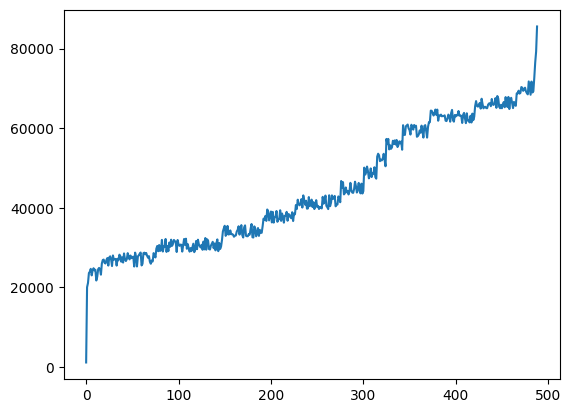

In [86]:
# handling categorical values
# start_date_local, type, start_time, weather_station
# drop type (all "Run")
# drop weather station
run_activities_encoded_temp = run_activities.drop(labels=["type", "weather_station"], axis=1)

#run_activities_encoded["date-time"] = run_activities_encoded["start_date_local"] + run_activities_encoded["start_time"]
run_activities_encoded_temp.loc[:,"date-time"] = pd.to_datetime(run_activities_encoded_temp.start_date_local.astype(str)+ " " + run_activities_encoded_temp.start_time.astype(str ))


run_activities_encoded_temp["year"] = run_activities_encoded_temp["date-time"].dt.year
run_activities_encoded_temp["month"] = run_activities_encoded_temp["date-time"].dt.month
run_activities_encoded_temp["day"] = run_activities_encoded_temp["date-time"].dt.day
run_activities_encoded_temp["hour"] = run_activities_encoded_temp["date-time"].dt.hour
run_activities_encoded_temp["min"] = run_activities_encoded_temp["date-time"].dt.minute
run_activities_encoded_temp["sec"] = run_activities_encoded_temp["date-time"].dt.second
run_activities_encoded_temp["total_seconds"] = run_activities_encoded_temp["hour"]*60*60 +  run_activities_encoded_temp["min"]*60 +  run_activities_encoded_temp["sec"]

#run_activities_encoded = run_activities.drop(labels=["start_date_local", "start_time"], axis=1)

display(run_activities_encoded_temp.head())

# encoding cyclical feature - 24hr time
run_activities_encoded_temp_time = run_activities_encoded_temp.sort_values("hour").reset_index(drop=True)
run_activities_encoded_temp_time.total_seconds.plot()

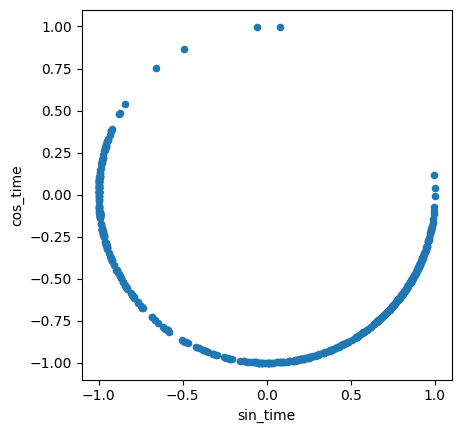

In [90]:
seconds_in_day = 24*60*60
run_activities_encoded_temp_time["sin_time"] = np.sin(2*np.pi*run_activities_encoded_temp_time.total_seconds/seconds_in_day)
run_activities_encoded_temp_time["cos_time"] = np.cos(2*np.pi*run_activities_encoded_temp_time.total_seconds/seconds_in_day)
run_activities_encoded_temp_time[["sin_time", "cos_time"]].head()
run_activities_encoded_temp_time.plot.scatter("sin_time", "cos_time").set_aspect("equal")

In [91]:
run_activities_encoded_temp["sin_time"] = np.sin(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
run_activities_encoded_temp["cos_time"] = np.cos(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
run_activities_encoded_temp.head()

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,date-time,year,month,day,hour,min,sec,total_seconds,sin_time,cos_time
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,2023-11-11 07:00:10,2023,11,11,7,0,10,25210,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,2023-11-11 06:26:00,2023,11,11,6,26,0,23160,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,2023-11-10 09:52:33,2023,11,10,9,52,33,35553,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,2023-11-08 13:29:36,2023,11,8,13,29,36,48576,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,2023-11-07 16:52:39,2023,11,7,16,52,39,60759,-0.957130,-0.289658


In [93]:
def sin_transformer(period):
    np.sin(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,sec,total_seconds,sin_time,cos_time,month_sin,month_cos,day_sin,day_cos,sec_sin,sec_cos
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,10,25210,0.965737,-0.259521,-0.5,0.866025,0.790776,-0.612106,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,0,23160,0.993572,-0.113203,-0.5,0.866025,0.790776,-0.612106,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,33,35553,0.527883,-0.849317,-0.5,0.866025,0.897805,-0.440394,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,36,48576,-0.381070,-0.924546,-0.5,0.866025,0.998717,-0.050649,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,39,60759,-0.957130,-0.289658,-0.5,0.866025,0.988468,0.151428,-0.957130,-0.289658


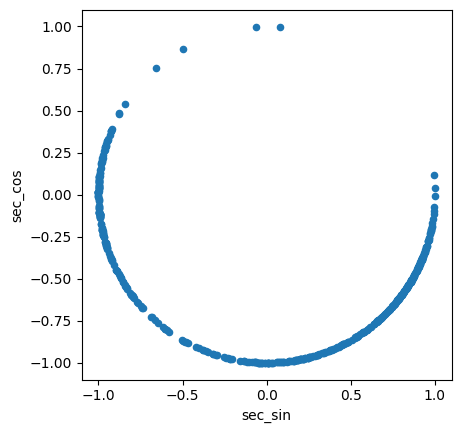

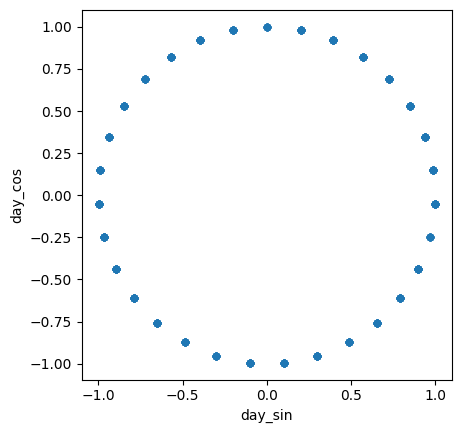

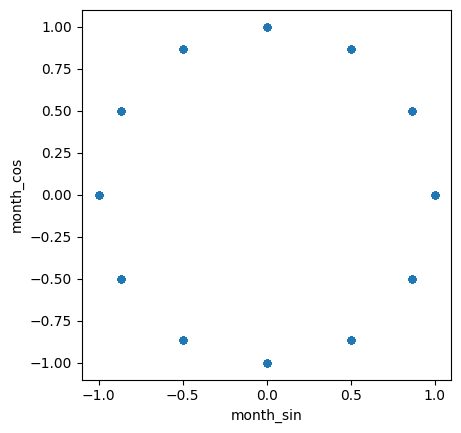

In [103]:
run_activities_encoded_2 = run_activities_encoded_temp.copy()

run_activities_encoded_2["month_sin"] = np.sin(2*np.pi*run_activities_encoded_2.month/12)
run_activities_encoded_2["month_cos"] = np.cos(2*np.pi*run_activities_encoded_2.month/12)

run_activities_encoded_2["day_sin"] = np.sin(2*np.pi*run_activities_encoded_2.day/31)
run_activities_encoded_2["day_cos"] = np.cos(2*np.pi*run_activities_encoded_2.day/31)

run_activities_encoded_2["sec_sin"] = np.sin(2*np.pi*run_activities_encoded_2.total_seconds/seconds_in_day)
run_activities_encoded_2["sec_cos"] = np.cos(2*np.pi*run_activities_encoded_2.total_seconds/seconds_in_day)

run_activities_encoded_2.plot.scatter("sec_sin", "sec_cos").set_aspect("equal")
run_activities_encoded_2.plot.scatter("day_sin", "day_cos").set_aspect("equal")
run_activities_encoded_2.plot.scatter("month_sin", "month_cos").set_aspect("equal")

run_activities_encoded_2.head()

In [106]:
one_hot_year = pd.get_dummies(run_activities_encoded_2["year"])
run_activities_encoded_2 = run_activities_encoded_2.join(one_hot_year)
run_activities_encoded_2

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,sin_time,cos_time,month_sin,month_cos,day_sin,day_cos,sec_sin,sec_cos,2022,2023
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,0.965737,-0.259521,-0.500000,8.660254e-01,0.790776,-0.612106,0.965737,-0.259521,False,True
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,0.965737,-0.259521,-0.500000,8.660254e-01,0.790776,-0.612106,0.965737,-0.259521,False,True
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,0.965737,-0.259521,-0.500000,8.660254e-01,0.790776,-0.612106,0.965737,-0.259521,True,False
0,2023-05-13,17718.7,5151,71.0,3.440,7.077,79.3,151.3,171.0,200.5,...,0.303825,-0.952728,0.500000,-8.660254e-01,0.485302,-0.874347,0.303825,-0.952728,False,True
0,2023-05-13,17718.7,5151,71.0,3.440,7.077,79.3,151.3,171.0,200.5,...,0.303825,-0.952728,0.500000,-8.660254e-01,0.485302,-0.874347,0.303825,-0.952728,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2022-03-15,9878.6,2944,59.2,3.355,4.890,79.9,146.7,179.0,162.2,...,-0.956687,0.291120,1.000000,6.123234e-17,0.101168,-0.994869,-0.956687,0.291120,True,False
199,2022-10-28,6695.8,2007,16.5,3.336,6.378,78.6,145.9,166.0,207.9,...,0.640668,-0.767818,-0.866025,5.000000e-01,-0.571268,0.820763,0.640668,-0.767818,True,False
199,2022-10-28,6695.8,2007,16.5,3.336,6.378,78.6,145.9,166.0,207.9,...,0.640668,-0.767818,-0.866025,5.000000e-01,-0.571268,0.820763,0.640668,-0.767818,True,False
199,2022-03-14,8450.3,2463,71.3,3.431,4.140,80.5,142.7,158.0,312.1,...,0.819569,-0.572981,1.000000,6.123234e-17,0.299363,-0.954139,0.819569,-0.572981,True,False


In [42]:
# handle via KNN
print(run_activities.dtypes)
knn_imputer = KNN()
run_activities_knn = knn_imputer.fit_transform(run_activities)
print(run_activities_knn.isnull().sum())

start_date_local         object
distance                float64
moving_time               int64
total_elevation_gain    float64
type                     object
average_speed           float64
max_speed               float64
average_cadence         float64
average_heartrate       float64
max_heartrate           float64
elev_high               float64
start_time               object
start_lat               float64
start_lng               float64
weather_station          object
avg_temp                float64
dtype: object


TypeError: float() argument must be a string or a real number, not 'datetime.date'